In [8]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) ==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
june_temps_list=list((june_temps))

In [12]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list,columns=['date','June Temps'])
june_temps_df.set_index(june_temps_df['date'], inplace=True)



In [14]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [15]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) ==12).all()

In [16]:
# 7. Convert the December temperatures to a list.
december_temps_list=list((december_temps))

In [17]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(december_temps_list,columns=['date','December Temps'])
dec_temps_df.set_index(dec_temps_df['date'], inplace=True)

In [19]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [20]:
# Additional quries for requirement 3
session.query(func.count(Station.station)).all()

[(9,)]

In [21]:
# Additional quries for requirement 3
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

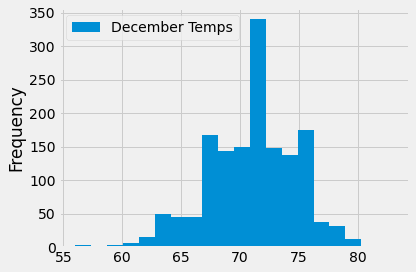

In [38]:
# Additional quries for requirement 3
import datetime as dt

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt



dec_temps_df.plot.hist(bins=20)

plt.tight_layout()

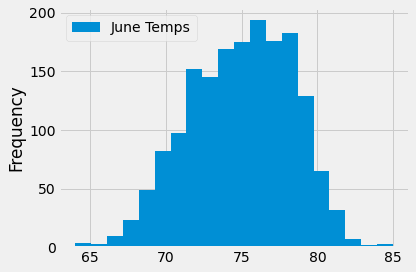

In [39]:
# Additional quries for requirement 3
june_temps_df.plot.hist(bins=20)

plt.tight_layout()